In [1]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
import argparse
import numpy as np
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import keras
from IPython.core.display import HTML
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import keras
from keras import layers
from keras import ops
import pandas_ta as ta
from catboost import CatBoostClassifier
from catboost import Pool
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd

HTML("""
<style>
.container { width:100% !important; }
</style>
""")


# Big Picture
* Stock market prediction is extremely hard

Intraday it is
* Hard to beat flipping a coin in the case of predicting if stock will go up or down
* Hard to beat the baseline of the stock price not changing and the return being 0.

# Agenda

### Discuss Evaluation Metrics and Baselines

### End to end ML Walkthrough!
* **Feature Extraction** with technical indicators
* **Model Training** using with popular algorithms Decision Trees, Random Forest,Catboost, Neural Networks, LSTMs for 5 minute bar predictions
* **Model Evaluation** and comparing to the baseline! 

# Supervided Learning Tasks
* Using 5 minute bars predict next 5 minutes

## Binary Classification
Predict if a stock will go up (BUY) or down (SELL).

* Really hard to beat the baseline of "randomly flipping a coin"

## Regression 

Predict Simple Returns or Log Returns

- **Simple Returns:** $$\text{Simple Returns} = \frac{S_{t+1} - S_t}{S_t}$$
- **Log Returns:** $$\text{Log Returns} = \log\left(\frac{S_{t+1}}{S_t}\right)$$

* Predicting returns, rather than absolute prices, addresses issues of non-stationarity and scale inherent in price data. This approach focuses on the relative changes and better aligns with the metrics of investment performance that investors care about.
* It's particularly challenging to beat the baseline prediction of a return equal to 0.


# Predicting stock prices with Machine Learning (ML) is exceptionally challenging due to several reasons:

1. **Market Efficiency:** The Efficient Market Hypothesis suggests that stock prices reflect all available information, making it difficult for investors to achieve consistently higher returns. This implies that any new information affecting a stock's price is almost instantly factored into its current price, leaving minimal opportunity for ML models to exploit.

2. **High Noise to Signal Ratio:** Financial markets are filled with noise, with prices influenced by myriad factors, many of which are unpredictable or have subtle effects. This complicates the task for ML models to discern and learn from patterns that lead to consistently profitable predictions.

3. **Non-Stationary and Non-Linear Relationships:** The dynamics of financial markets evolve, rendering them non-stationary. Thus, relationships between variables that existed in the past may change or vanish, undermining the efficacy of models trained on historical data. Furthermore, these relationships are often non-linear and complex, challenging ML models' ability to accurately forecast future movements.

4. **Overfitting:** The complexity and variability of stock market data render ML models particularly susceptible to overfitting, where a model learns the noise in the training data rather than the underlying patterns. This results in diminished performance when the model is applied to new, unseen data.

5. **Impact of Unquantifiable Factors:** Factors such as political events, investor sentiment, and market rumors, which are difficult to quantify and incorporate into ML models, can significantly affect stock prices. These qualitative factors pose a significant challenge for accurate prediction by ML models.

6. **Data Availability and Quality:** Access to high-quality, granular, and relevant financial data can be costly and challenging. Even when such data is available, the volume and complexity of financial data can overwhelm many ML models, necessitating extensive preprocessing and feature engineering to make the data actionable.


7. **Non-Independently and Identically Distributed (Non-IID) Data:** Financial data often exhibits non-IID characteristics, where the assumption that data points are independently and identically distributed does not hold. This is due to the influence of various factors such as market conditions, economic policies, and investor behavior, which vary over time and across different segments of the market. As a result, statistical properties and relationships in the data can shift, making it challenging for ML models to learn stable and generalizable patterns. This complexity requires advanced modeling techniques and careful consideration of temporal and contextual dynamics in the data.

### Please subscribe for weekly ML video applied to finance.
* Will discuss many topics and intricices related to ML in finance in much greater detail 
* See link to playlist in description: https://youtube.com/playlist?list=PLCZZtBmmgxn90kZQhaJgeAeMTLD1pRD9B&si=TILyJAJY3uZqznbh
* Write in the comment section requests for specific topics you are interested in

# Binary Classification Metrics
* Need balancing act of beating random guessing, but not by too much since that indicates leakage!
## Goal: Predict BUY OR SELL! Will stock go up or down
**Log Loss (Binary Classification) aka Binary Cross Entropy**
* *Definition*: Measures the accuracy of a classifier. It penalizes false classifications, focusing on the confidence of the prediction.
* *Formula*: `Log Loss = -1/N * sum(y_i * log(p_i) + (1 - y_i) * log(1 - p_i))`
    - Where:
        - `N` is the number of samples
        - `y_i` is the actual label (0 or 1)
        - `p_i` is the predicted probability of the observation belonging to class 1.
* *Baseline for Random Guessing*: Log Loss value of 0.6931 occurs when a model guesses the two classes (0 and 1) with equal probability (0.5 for each). This is because `log(0.5) = -0.6931`, and when this value is used for both correct and incorrect predictions uniformly, the average Log Loss stabilizes at 0.6931, representing a model with no predictive ability beyond random chance.

**Confusion Matrix**
* *Definition*: A table used to describe the performance of a classification model on a set of test data for which the true values are known. It contrasts the actual target values with those predicted by the model, providing insight into the exact types of errors being made.
* *Components*:
    - *True Positives (TP)*: Correctly predicted positive observations.
    - *True Negatives (TN)*: Correctly predicted negative observations.
    - *False Positives (FP)*: Incorrectly predicted positive observations (Type I error).
    - *False Negatives (FN)*: Incorrectly predicted negative observations (Type II error).
* *Utility*: Beyond individual accuracy, precision, recall, and F1 score metrics derived from it, the confusion matrix helps in understanding the model's performance across different classes, highlighting its strengths and weaknesses in specific areas of prediction.

**Precision and Recall**
*Definition*: Precision and Recall are metrics derived from the confusion matrix to evaluate the accuracy of a classification model in predictive analytics, especially when classes are imbalanced.

* **Precision** (Positive Predictive Value): The ratio of true positive predictions to the total predicted positives. It measures the model's accuracy in predicting positive instances.
    - *Formula*: $$\text{Precision} = \frac{TP}{TP + FP}$$
    - *Interpretation*: High precision indicates a low rate of false positives, which is crucial in scenarios where the cost of a false positive is high, such as false alarms in fraud detection.

* **Recall** (Sensitivity or True Positive Rate): The ratio of true positive predictions to the actual positives. It assesses the model's ability to detect all relevant instances.
    - *Formula*: $$\text{Recall} = \frac{TP}{TP + FN}$$
    - *Interpretation*: High recall indicates a low rate of false negatives, essential in situations where missing a positive case has serious consequences, like failing to identify a risky investment.

*Utility*: Precision and Recall provide a more nuanced understanding of a model's performance than accuracy alone, especially in imbalanced datasets. They help in tuning models according to specific requirements, balancing the trade-off between ensuring relevant results (high precision) and not missing key instances (high recall). The choice between prioritizing precision or recall depends on the specific application and the relative costs of false positives and false negatives.


**AUC-ROC (Binary Classification)**
* *Definition*: Evaluates the performance across all classification thresholds, summarizing the trade-off between the true positive rate and false positive rate.
* *Range*: 0.5 (no discriminative ability) to 1 (perfect model).
* *Interpretation*: Higher AUC indicates better model performance.

**Baseline Models for Binary Classification**
* *Purpose*: Provides a reference point to evaluate the performance of your models.
* *Examples*: 
    - Predicting the most frequent class.
    - Using simple algorithms like logistic regression. 

**Advantages of Log Loss and AUC over Accuracy**
* *Log Loss*:
    - *Sensitivity to Prediction Confidence*: Penalizes incorrect confident predictions more heavily.
    - *Applicability to Imbalanced Classes*: Offers detailed performance insight, especially in imbalanced scenarios.
* *AUC-ROC*:
    - *Performance Across Thresholds*: Provides a comprehensive overview across all thresholds.
    - *Robustness to Imbalanced Datasets*: Evaluates true vs. false positive rates, enabling fair comparisons.
    - *Interpretability*: Straightforward metric indicating better performance with higher values.


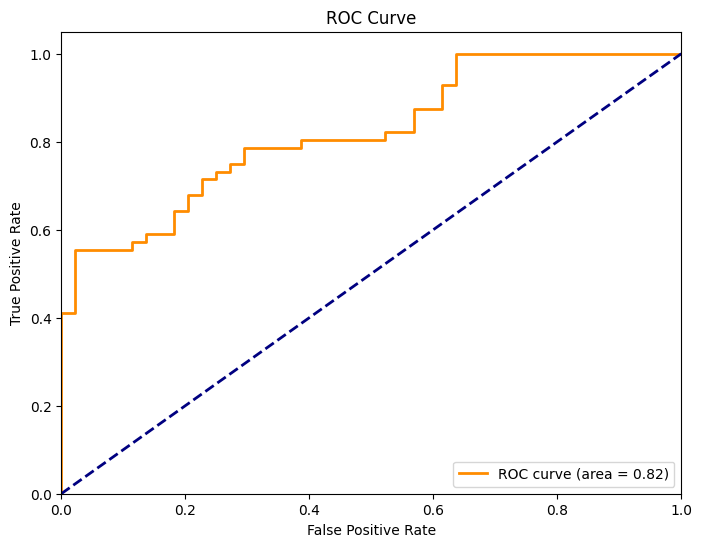

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Improved predictions
np.random.seed(42)
y_true = np.random.randint(0, 2, size=100)
y_scores = np.where(y_true == 1, np.random.uniform(0.3, 1, size=y_true.shape[0]), np.random.uniform(0, 0.7, size=y_true.shape[0]))

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Let's define a "Classification Report" to measure how our algorithm is doing!
* Using Sckit-Learn (sklearn)

In [3]:
def get_classification_report(labels,probs):
    # Get predictions from probs
    predictions = (probs>=0.5).astype(int)
    
    # 2. Generate the confusion matrix
    conf_matrix = confusion_matrix(labels, predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    # 3. Calculate Accuracy
    accuracy = accuracy_score(labels, predictions)
    print("\nAccuracy:", accuracy)
    
    # 4. Calculate Balanced Accuracy
    balanced_accuracy = balanced_accuracy_score(labels, predictions)
    print("\nBalanced Accuracy:", balanced_accuracy)
    
    # 5. Generate a classification report for other metrics
    class_report = classification_report(labels, predictions, target_names=["SELL","BUY"]) # Modify target_names based on your classes
    print("\nClassification Report:")
    print(class_report)
    
    # 5. Calculate AUC
    auc = roc_auc_score(labels, probs)
    print(f"AUC: {auc}")

    # 6. Calculate log loss
    loss = log_loss(labels, probs)
    print(f"Log loss: {loss}")



### Load 5 minute bars
* Only take regular trading hours

In [4]:
os.chdir('C:\\Users\\adidr\\OneDrive\\Desktop\\ib-tutorials')
df = pd.read_csv('tsla_5mins_fixed.csv',index_col='date',parse_dates=['date']).sort_index()
 
# Limit to regualar trading hours     
df=df.between_time('9:30','15:59:55')

df


,Open,High,Low,Close,Volume
date,,,,,
2021-01-04 09:30:00,239.8333,242.7500,239.0600,242.6833,5496375.0
2021-01-04 09:35:00,242.7100,243.6267,241.8600,242.2833,3742554.0
2021-01-04 09:40:00,242.4200,247.6167,242.3100,247.5333,4520967.0
2021-01-04 09:45:00,247.5100,247.9200,246.4700,246.9067,3496944.0
2021-01-04 09:50:00,246.8467,247.2667,245.0733,245.7933,2272224.0
...,...,...,...,...,...
2023-11-22 15:35:00,233.3200,233.4900,233.2100,233.4500,600678.0
2023-11-22 15:40:00,233.4600,233.7000,233.2700,233.6900,973646.0
2023-11-22 15:45:00,233.6900,234.1500,233.5800,234.0300,994516.0


### Create Classification Label for Next 5 min bars
* UP BAR
* DOWN BAR

In [5]:
df['LABEL']=np.sign(df['Close'].shift(-1)-df['Close'])
df.LABEL.value_counts()

LABEL
 1.0    28246
-1.0    28207
 0.0      330
Name: count, dtype: int64

In [6]:
df['LABEL']=(df['Close'].shift(-1)>df['Close']).astype(int)
df.LABEL.value_counts()

LABEL
0    28538
1    28246
Name: count, dtype: int64

### Extract Features with Pandas TA Library
* Video on Pandas_TA: https://youtu.be/4IOG9N0Zm3A?si=xnc2vAneyCuIUnSA
* Video on Ta-Lib: https://youtu.be/dzkft2sLK7k?si=rCSBSZ0yxSuQXcxp
* Video on Ta-Lib Installation: https://youtu.be/g_jOhhnhbA0?si=RLRz1cs9s00dBcPZ

In [7]:
def extract_features(df):
    df = df.copy()
    ta_list = [{"kind": "rsi"}, {"kind": "rsi", "length": 840},
               {"kind": "rsi", "length": 70}, {"kind": "ppo"}, {"kind": "ppo", "fast": 40, "slow": 200, "signal": 12},
               {"kind": "log_return", "length": 840}, {"kind": "log_return", "length": 1},
               {"kind": "log_return", "length": 2}, {"kind": "log_return", "length": 3},
               {"kind": "aroon"},
               {"kind": "bop"},
               {"kind": "mfi"}, {"kind": "mfi", "length": 70}, {"kind": "vwap", "length": 14},
               {"kind": "vwap", "length": 200},
               {"kind": "mfi"}, {"kind": "mfi", "length": 840},{'kind':'kvo'},
               {"kind": "mfi"},
               {"kind": "adx"}, {"kind": "adx", "length": 70},
               {"kind": "adx"}, {"kind": "adx", "length": 840},
               {"kind": "adx"}, 
               {"kind": "natr"}, {"kind": "natr", "length": 70}, {"kind": "natr", "length": 840},
               {"kind": "squeeze_pro"},
               {"kind": "skew"}, {"kind": "skew", "length": 90}, {"kind": "skew", "length": 200},
               {"kind": "slope", "length": 1}, {"kind": "slope", "length": 60}, {"kind": "slope", "length": 300},
               {"kind": "slope", "length": 1200},
               {"kind": "slope", "length": 5}, {"kind": "slope", "length": 10}, {"kind": "slope", "length": 20},
               {"kind": "slope", "length": 70},
               {"kind": "log_return", "length": 1}, {"kind": "log_return", "length": 80},
               {"kind": "log_return", "length": 3}, {"kind": "log_return", "length": 4},
               {"kind": "log_return", "length": 5},
               {"kind": "log_return", "length": 10}, {"kind": "log_return", "length": 60},
               {"kind": "log_return", "length": 300}, {"kind": "log_return", "length": 1200},{'kind':'adosc'},
               {'kind':'pvr'},{'kind':'pvt'},{'kind':'chop'},{'kind':'rsx'},{'kind':'rvgi'},{'kind':'uo'},{'kind':'tsi'},
               {'kind':'dpo'} ### Leakage!!!!
               ]
    df['PREV_RETURN']=np.log(df['Close']/df['Close'].shift(1))
    ta_strategy = ta.Strategy(name="C", ta=ta_list)
    df.ta.strategy(ta_strategy)
    
    df[f"""serial_correlation_50_1"""]=df['PREV_RETURN'].rolling(window=50).apply(lambda x: x.autocorr(lag=1), raw=False)
    
    # Drop missing values
    df.dropna(axis=0,inplace=True)
    
    return df


df_with_features=extract_features(df)

df_with_features


,Open,High,Low,Close,Volume,LABEL,PREV_RETURN,RSI_14,RSI_840,RSI_70,...,PVT,CHOP_14_1_100,RSX_14,RVGI_14_4,RVGIs_14_4,UO_7_14_28,TSI_13_25_13,TSIs_13_25_13,DPO_20,serial_correlation_50_1
date,,,,,,,,,,,,,,,,,,,,,
2021-02-03 12:55:00,286.4500,286.8633,285.8833,286.1267,459699.0,1,-0.001443,38.589439,51.500601,49.275659,...,8.803861e+07,46.669668,43.677265,-0.034304,0.104102,29.863009,-3.577866,-2.195433,-0.640145,-0.020455
2021-02-03 13:00:00,286.1133,286.9533,286.1033,286.3467,255252.0,1,0.000769,40.865114,51.518911,49.560990,...,8.805823e+07,45.906915,36.725154,-0.128016,0.019149,28.282276,-5.574056,-2.678093,-0.309810,-0.017953
2021-02-03 13:05:00,286.3000,286.6233,286.0333,286.3500,132573.0,1,0.000012,40.900491,51.519186,49.565307,...,8.805838e+07,44.408598,31.507992,-0.184191,-0.071943,30.175838,-7.219708,-3.326895,-0.154340,-0.015336
2021-02-03 13:10:00,286.3633,286.7033,286.3433,286.4667,115692.0,0,0.000407,42.217004,51.528917,49.719704,...,8.806310e+07,42.641712,28.070207,-0.213231,-0.145325,29.110498,-8.288995,-4.035767,0.089525,-0.018006
2021-02-03 13:15:00,286.5000,286.7267,286.0033,286.3300,135681.0,0,-0.000477,41.063086,51.516790,49.539482,...,8.805662e+07,43.298426,25.518553,-0.226796,-0.191609,32.049469,-9.509211,-4.817687,0.050325,-0.031670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 14:40:00,231.6300,232.3900,231.5000,232.3100,989075.0,0,0.002845,40.504364,50.446720,43.902638,...,9.419987e+08,39.038332,34.122446,-0.157329,-0.045518,37.298332,-8.186875,-0.614749,-0.776000,-0.026938
2023-11-22 14:45:00,232.3100,232.3800,231.7600,232.0600,796579.0,1,-0.001077,38.750426,50.414948,43.528400,...,9.419130e+08,38.641965,31.389138,-0.209946,-0.115410,41.025136,-10.590149,-2.039807,-1.002000,-0.067092
2023-11-22 14:50:00,232.0700,232.5900,232.0000,232.4800,675994.0,1,0.001808,43.200346,50.467420,44.337089,...,9.420353e+08,38.120411,30.944679,-0.212282,-0.171431,44.844270,-11.100614,-3.334208,-0.545000,-0.068859


### Split over time to train/test

In [8]:
split_fraction = 0.6
train_split = int(split_fraction * int(df_with_features.shape[0]))

train = df_with_features.iloc[:train_split,:]
test = df_with_features.iloc[train_split:,:]

print("TRAIN DATE RANGE",train.index.min(),train.index.max())
print("TEST DATE RANGE",test.index.min(),test.index.max())

TRAIN DATE RANGE 2021-02-03 12:55:00 2022-10-10 11:30:00
TEST DATE RANGE 2022-10-10 11:35:00 2023-11-22 15:00:00


### Define Feature Columns to Use

In [9]:
feature_cols=['RSI_14', 'RSI_840',''
       'RSI_70', 'PPO_12_26_9', 'PPOh_12_26_9', 'PPOs_12_26_9',
       'PPO_40_200_12', 'PPOh_40_200_12', 'PPOs_40_200_12', 'LOGRET_840',
       'LOGRET_1', 
              'LOGRET_2', 'LOGRET_3', 'AROOND_14', 'AROONU_14',
       'AROONOSC_14', 
              'BOP', 'MFI_14','serial_correlation_50_1']#+['DPO_20']

 
    
 
    

# Critical Note: If you have good accuracy like 55 or 60 pct then chances are you have some sort of leakage!!!
* If you can get this accuracy you would be super rich! assuming your trades don't influence stock prices which for a small player is reasonable!
* Data Leak Issue with DPO: https://github.com/twopirllc/pandas-ta/issues/60


### Decision Tree

In [10]:
clf = DecisionTreeClassifier(max_depth=4)

In [11]:
clf.fit(train[feature_cols],train['LABEL'])

DecisionTreeClassifier(max_depth=4)

In [12]:
probs = clf.predict_proba(test[feature_cols])[:,1]
get_classification_report(test.LABEL,probs)

Confusion Matrix:
[[4193 6692]
 [4136 7017]]

Accuracy: 0.5086668481713404

Balanced Accuracy: 0.5071835386381125

Classification Report:
              precision    recall  f1-score   support

        SELL       0.50      0.39      0.44     10885
         BUY       0.51      0.63      0.56     11153

    accuracy                           0.51     22038
   macro avg       0.51      0.51      0.50     22038
weighted avg       0.51      0.51      0.50     22038

AUC: 0.5075886814380891
Log loss: 0.6952819239998131


##### Plot Tree

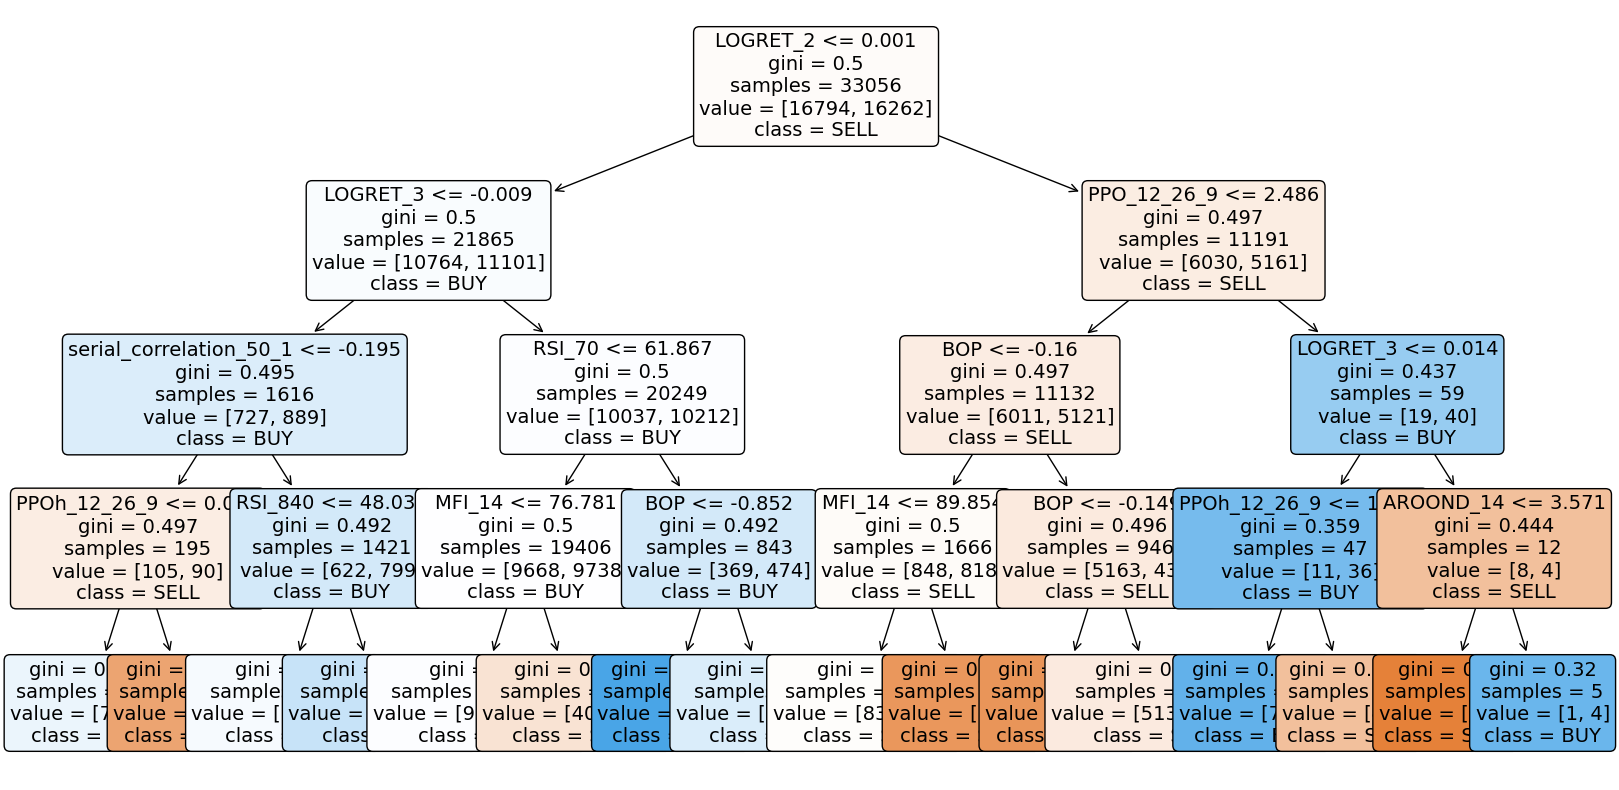

In [13]:
# Set figure size
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(clf, 
               filled=True, 
               rounded=True, 
               class_names=["SELL","BUY"],
               feature_names=feature_cols, 
               fontsize=14)

# Show the plot
plt.show()


### Random Forest

In [14]:
clf = RandomForestClassifier(class_weight='balanced',max_depth=8)
clf.fit(train[feature_cols],train['LABEL'])

RandomForestClassifier(class_weight='balanced', max_depth=8)

In [15]:
probs = clf.predict_proba(test[feature_cols])[:,1]
get_classification_report(test.LABEL,probs)

Confusion Matrix:
[[5405 5480]
 [5348 5805]]

Accuracy: 0.5086668481713404

Balanced Accuracy: 0.5085213265968923

Classification Report:
              precision    recall  f1-score   support

        SELL       0.50      0.50      0.50     10885
         BUY       0.51      0.52      0.52     11153

    accuracy                           0.51     22038
   macro avg       0.51      0.51      0.51     22038
weighted avg       0.51      0.51      0.51     22038

AUC: 0.5169318339588735
Log loss: 0.6930801480310776


##### Can look at feature importance

In [16]:
pd.DataFrame({'feature':feature_cols,'score':clf.feature_importances_}).sort_values('score',ascending=False)

,feature,score
10,LOGRET_1,0.074644
11,LOGRET_2,0.073986
12,LOGRET_3,0.068850
16,BOP,0.066388
9,LOGRET_840,0.059135
5,PPOs_12_26_9,0.057027
2,RSI_70,0.056954
17,MFI_14,0.056506
7,PPOh_40_200_12,0.056385
0,RSI_14,0.055746


### Catboost

In [17]:
clf = CatBoostClassifier(learning_rate=0.001,random_seed=12,auto_class_weights='Balanced')

test_pool = Pool(
        data=test[feature_cols],
        label=test.LABEL
)
clf.fit(train[feature_cols], train['LABEL'], use_best_model=False, eval_set=test_pool, plot=False)

0:	learn: 0.6931417	test: 0.6931465	best: 0.6931465 (0)	total: 156ms	remaining: 2m 35s
1:	learn: 0.6931384	test: 0.6931458	best: 0.6931458 (1)	total: 178ms	remaining: 1m 28s
2:	learn: 0.6931342	test: 0.6931449	best: 0.6931449 (2)	total: 202ms	remaining: 1m 7s
3:	learn: 0.6931297	test: 0.6931438	best: 0.6931438 (3)	total: 226ms	remaining: 56.2s
4:	learn: 0.6931253	test: 0.6931428	best: 0.6931428 (4)	total: 253ms	remaining: 50.4s
5:	learn: 0.6931212	test: 0.6931422	best: 0.6931422 (5)	total: 269ms	remaining: 44.6s
6:	learn: 0.6931179	test: 0.6931418	best: 0.6931418 (6)	total: 289ms	remaining: 40.9s
7:	learn: 0.6931136	test: 0.6931414	best: 0.6931414 (7)	total: 305ms	remaining: 37.8s
8:	learn: 0.6931092	test: 0.6931399	best: 0.6931399 (8)	total: 323ms	remaining: 35.6s
9:	learn: 0.6931050	test: 0.6931390	best: 0.6931390 (9)	total: 344ms	remaining: 34.1s
10:	learn: 0.6931004	test: 0.6931384	best: 0.6931384 (10)	total: 365ms	remaining: 32.8s
11:	learn: 0.6930961	test: 0.6931381	best: 0.69313

94:	learn: 0.6927776	test: 0.6930850	best: 0.6930850 (94)	total: 1.62s	remaining: 15.4s
95:	learn: 0.6927744	test: 0.6930846	best: 0.6930846 (95)	total: 1.63s	remaining: 15.4s
96:	learn: 0.6927715	test: 0.6930838	best: 0.6930838 (96)	total: 1.64s	remaining: 15.3s
97:	learn: 0.6927668	test: 0.6930834	best: 0.6930834 (97)	total: 1.66s	remaining: 15.3s
98:	learn: 0.6927633	test: 0.6930826	best: 0.6930826 (98)	total: 1.67s	remaining: 15.2s
99:	learn: 0.6927594	test: 0.6930816	best: 0.6930816 (99)	total: 1.68s	remaining: 15.1s
100:	learn: 0.6927564	test: 0.6930812	best: 0.6930812 (100)	total: 1.69s	remaining: 15.1s
101:	learn: 0.6927521	test: 0.6930805	best: 0.6930805 (101)	total: 1.71s	remaining: 15s
102:	learn: 0.6927480	test: 0.6930800	best: 0.6930800 (102)	total: 1.72s	remaining: 15s
103:	learn: 0.6927442	test: 0.6930793	best: 0.6930793 (103)	total: 1.73s	remaining: 14.9s
104:	learn: 0.6927406	test: 0.6930792	best: 0.6930792 (104)	total: 1.75s	remaining: 14.9s
105:	learn: 0.6927359	test

195:	learn: 0.6924168	test: 0.6930359	best: 0.6930359 (195)	total: 3.34s	remaining: 13.7s
196:	learn: 0.6924133	test: 0.6930344	best: 0.6930344 (196)	total: 3.35s	remaining: 13.7s
197:	learn: 0.6924094	test: 0.6930343	best: 0.6930343 (197)	total: 3.37s	remaining: 13.7s
198:	learn: 0.6924053	test: 0.6930347	best: 0.6930343 (197)	total: 3.39s	remaining: 13.6s
199:	learn: 0.6924023	test: 0.6930344	best: 0.6930343 (197)	total: 3.41s	remaining: 13.6s
200:	learn: 0.6923998	test: 0.6930343	best: 0.6930343 (197)	total: 3.42s	remaining: 13.6s
201:	learn: 0.6923967	test: 0.6930337	best: 0.6930337 (201)	total: 3.44s	remaining: 13.6s
202:	learn: 0.6923931	test: 0.6930336	best: 0.6930336 (202)	total: 3.46s	remaining: 13.6s
203:	learn: 0.6923905	test: 0.6930335	best: 0.6930335 (203)	total: 3.47s	remaining: 13.5s
204:	learn: 0.6923866	test: 0.6930326	best: 0.6930326 (204)	total: 3.49s	remaining: 13.5s
205:	learn: 0.6923824	test: 0.6930328	best: 0.6930326 (204)	total: 3.5s	remaining: 13.5s
206:	learn:

296:	learn: 0.6920671	test: 0.6930068	best: 0.6930062 (293)	total: 5.01s	remaining: 11.9s
297:	learn: 0.6920641	test: 0.6930068	best: 0.6930062 (293)	total: 5.03s	remaining: 11.8s
298:	learn: 0.6920608	test: 0.6930065	best: 0.6930062 (293)	total: 5.05s	remaining: 11.8s
299:	learn: 0.6920576	test: 0.6930069	best: 0.6930062 (293)	total: 5.06s	remaining: 11.8s
300:	learn: 0.6920542	test: 0.6930068	best: 0.6930062 (293)	total: 5.08s	remaining: 11.8s
301:	learn: 0.6920509	test: 0.6930066	best: 0.6930062 (293)	total: 5.1s	remaining: 11.8s
302:	learn: 0.6920478	test: 0.6930067	best: 0.6930062 (293)	total: 5.12s	remaining: 11.8s
303:	learn: 0.6920445	test: 0.6930064	best: 0.6930062 (293)	total: 5.14s	remaining: 11.8s
304:	learn: 0.6920415	test: 0.6930069	best: 0.6930062 (293)	total: 5.15s	remaining: 11.7s
305:	learn: 0.6920383	test: 0.6930067	best: 0.6930062 (293)	total: 5.17s	remaining: 11.7s
306:	learn: 0.6920349	test: 0.6930061	best: 0.6930061 (306)	total: 5.18s	remaining: 11.7s
307:	learn:

399:	learn: 0.6917347	test: 0.6929902	best: 0.6929902 (399)	total: 6.72s	remaining: 10.1s
400:	learn: 0.6917326	test: 0.6929899	best: 0.6929899 (400)	total: 6.74s	remaining: 10.1s
401:	learn: 0.6917301	test: 0.6929899	best: 0.6929899 (401)	total: 6.76s	remaining: 10.1s
402:	learn: 0.6917271	test: 0.6929899	best: 0.6929899 (401)	total: 6.77s	remaining: 10s
403:	learn: 0.6917249	test: 0.6929898	best: 0.6929898 (403)	total: 6.79s	remaining: 10s
404:	learn: 0.6917221	test: 0.6929890	best: 0.6929890 (404)	total: 6.8s	remaining: 9.99s
405:	learn: 0.6917194	test: 0.6929890	best: 0.6929890 (404)	total: 6.82s	remaining: 9.98s
406:	learn: 0.6917163	test: 0.6929888	best: 0.6929888 (406)	total: 6.83s	remaining: 9.96s
407:	learn: 0.6917134	test: 0.6929890	best: 0.6929888 (406)	total: 6.85s	remaining: 9.94s
408:	learn: 0.6917103	test: 0.6929886	best: 0.6929886 (408)	total: 6.87s	remaining: 9.92s
409:	learn: 0.6917074	test: 0.6929888	best: 0.6929886 (408)	total: 6.88s	remaining: 9.91s
410:	learn: 0.6

500:	learn: 0.6914189	test: 0.6929754	best: 0.6929752 (499)	total: 8.45s	remaining: 8.42s
501:	learn: 0.6914166	test: 0.6929752	best: 0.6929752 (499)	total: 8.47s	remaining: 8.4s
502:	learn: 0.6914134	test: 0.6929757	best: 0.6929752 (499)	total: 8.49s	remaining: 8.38s
503:	learn: 0.6914106	test: 0.6929751	best: 0.6929751 (503)	total: 8.5s	remaining: 8.37s
504:	learn: 0.6914074	test: 0.6929755	best: 0.6929751 (503)	total: 8.52s	remaining: 8.35s
505:	learn: 0.6914042	test: 0.6929757	best: 0.6929751 (503)	total: 8.53s	remaining: 8.33s
506:	learn: 0.6914016	test: 0.6929759	best: 0.6929751 (503)	total: 8.55s	remaining: 8.31s
507:	learn: 0.6913987	test: 0.6929758	best: 0.6929751 (503)	total: 8.57s	remaining: 8.3s
508:	learn: 0.6913968	test: 0.6929760	best: 0.6929751 (503)	total: 8.58s	remaining: 8.28s
509:	learn: 0.6913938	test: 0.6929755	best: 0.6929751 (503)	total: 8.6s	remaining: 8.26s
510:	learn: 0.6913909	test: 0.6929754	best: 0.6929751 (503)	total: 8.62s	remaining: 8.24s
511:	learn: 0.

599:	learn: 0.6911280	test: 0.6929708	best: 0.6929708 (599)	total: 10.1s	remaining: 6.75s
600:	learn: 0.6911253	test: 0.6929708	best: 0.6929708 (600)	total: 10.1s	remaining: 6.73s
601:	learn: 0.6911227	test: 0.6929700	best: 0.6929700 (601)	total: 10.2s	remaining: 6.72s
602:	learn: 0.6911188	test: 0.6929697	best: 0.6929697 (602)	total: 10.2s	remaining: 6.7s
603:	learn: 0.6911160	test: 0.6929692	best: 0.6929692 (603)	total: 10.2s	remaining: 6.68s
604:	learn: 0.6911132	test: 0.6929687	best: 0.6929687 (604)	total: 10.2s	remaining: 6.67s
605:	learn: 0.6911101	test: 0.6929689	best: 0.6929687 (604)	total: 10.2s	remaining: 6.65s
606:	learn: 0.6911072	test: 0.6929686	best: 0.6929686 (606)	total: 10.2s	remaining: 6.63s
607:	learn: 0.6911035	test: 0.6929686	best: 0.6929686 (606)	total: 10.3s	remaining: 6.61s
608:	learn: 0.6911008	test: 0.6929682	best: 0.6929682 (608)	total: 10.3s	remaining: 6.59s
609:	learn: 0.6910981	test: 0.6929680	best: 0.6929680 (609)	total: 10.3s	remaining: 6.58s
610:	learn:

699:	learn: 0.6908426	test: 0.6929698	best: 0.6929658 (673)	total: 11.8s	remaining: 5.05s
700:	learn: 0.6908400	test: 0.6929697	best: 0.6929658 (673)	total: 11.8s	remaining: 5.03s
701:	learn: 0.6908366	test: 0.6929696	best: 0.6929658 (673)	total: 11.8s	remaining: 5.02s
702:	learn: 0.6908340	test: 0.6929701	best: 0.6929658 (673)	total: 11.8s	remaining: 5s
703:	learn: 0.6908315	test: 0.6929699	best: 0.6929658 (673)	total: 11.8s	remaining: 4.98s
704:	learn: 0.6908288	test: 0.6929698	best: 0.6929658 (673)	total: 11.9s	remaining: 4.96s
705:	learn: 0.6908258	test: 0.6929698	best: 0.6929658 (673)	total: 11.9s	remaining: 4.95s
706:	learn: 0.6908230	test: 0.6929700	best: 0.6929658 (673)	total: 11.9s	remaining: 4.93s
707:	learn: 0.6908210	test: 0.6929701	best: 0.6929658 (673)	total: 11.9s	remaining: 4.91s
708:	learn: 0.6908182	test: 0.6929700	best: 0.6929658 (673)	total: 11.9s	remaining: 4.9s
709:	learn: 0.6908149	test: 0.6929706	best: 0.6929658 (673)	total: 11.9s	remaining: 4.88s
710:	learn: 0.

802:	learn: 0.6905548	test: 0.6929720	best: 0.6929658 (673)	total: 13.5s	remaining: 3.3s
803:	learn: 0.6905516	test: 0.6929715	best: 0.6929658 (673)	total: 13.5s	remaining: 3.29s
804:	learn: 0.6905492	test: 0.6929722	best: 0.6929658 (673)	total: 13.5s	remaining: 3.27s
805:	learn: 0.6905467	test: 0.6929724	best: 0.6929658 (673)	total: 13.5s	remaining: 3.25s
806:	learn: 0.6905441	test: 0.6929728	best: 0.6929658 (673)	total: 13.5s	remaining: 3.23s
807:	learn: 0.6905407	test: 0.6929726	best: 0.6929658 (673)	total: 13.5s	remaining: 3.22s
808:	learn: 0.6905369	test: 0.6929719	best: 0.6929658 (673)	total: 13.6s	remaining: 3.2s
809:	learn: 0.6905344	test: 0.6929728	best: 0.6929658 (673)	total: 13.6s	remaining: 3.18s
810:	learn: 0.6905317	test: 0.6929725	best: 0.6929658 (673)	total: 13.6s	remaining: 3.17s
811:	learn: 0.6905280	test: 0.6929722	best: 0.6929658 (673)	total: 13.6s	remaining: 3.15s
812:	learn: 0.6905259	test: 0.6929724	best: 0.6929658 (673)	total: 13.6s	remaining: 3.13s
813:	learn: 

904:	learn: 0.6902864	test: 0.6929772	best: 0.6929658 (673)	total: 15.2s	remaining: 1.59s
905:	learn: 0.6902839	test: 0.6929774	best: 0.6929658 (673)	total: 15.2s	remaining: 1.57s
906:	learn: 0.6902817	test: 0.6929772	best: 0.6929658 (673)	total: 15.2s	remaining: 1.56s
907:	learn: 0.6902792	test: 0.6929772	best: 0.6929658 (673)	total: 15.2s	remaining: 1.54s
908:	learn: 0.6902769	test: 0.6929771	best: 0.6929658 (673)	total: 15.2s	remaining: 1.52s
909:	learn: 0.6902738	test: 0.6929782	best: 0.6929658 (673)	total: 15.2s	remaining: 1.51s
910:	learn: 0.6902706	test: 0.6929785	best: 0.6929658 (673)	total: 15.3s	remaining: 1.49s
911:	learn: 0.6902680	test: 0.6929787	best: 0.6929658 (673)	total: 15.3s	remaining: 1.47s
912:	learn: 0.6902653	test: 0.6929789	best: 0.6929658 (673)	total: 15.3s	remaining: 1.46s
913:	learn: 0.6902629	test: 0.6929788	best: 0.6929658 (673)	total: 15.3s	remaining: 1.44s
914:	learn: 0.6902604	test: 0.6929790	best: 0.6929658 (673)	total: 15.3s	remaining: 1.42s
915:	learn

998:	learn: 0.6900351	test: 0.6929804	best: 0.6929658 (673)	total: 16.7s	remaining: 16.7ms
999:	learn: 0.6900318	test: 0.6929801	best: 0.6929658 (673)	total: 16.7s	remaining: 0us

bestTest = 0.6929658479
bestIteration = 673



In [18]:
probs = clf.predict_proba(test[feature_cols])[:,1]
get_classification_report(test.LABEL,probs)

Confusion Matrix:
[[5048 5837]
 [5031 6122]]

Accuracy: 0.506851801433887

Balanced Accuracy: 0.5063340357060588

Classification Report:
              precision    recall  f1-score   support

        SELL       0.50      0.46      0.48     10885
         BUY       0.51      0.55      0.53     11153

    accuracy                           0.51     22038
   macro avg       0.51      0.51      0.51     22038
weighted avg       0.51      0.51      0.51     22038

AUC: 0.5113419679283607
Log loss: 0.6929616040082717


##### Can look at feature importance

In [19]:
pd.DataFrame({'feature':feature_cols,'score':clf.feature_importances_}).sort_values('score',ascending=False)

,feature,score
11,LOGRET_2,16.261741
12,LOGRET_3,8.537662
16,BOP,6.399654
10,LOGRET_1,6.101914
13,AROOND_14,5.762339
2,RSI_70,5.408707
0,RSI_14,4.988568
7,PPOh_40_200_12,4.924270
5,PPOs_12_26_9,4.708373
9,LOGRET_840,4.601672


### Neural Networks using Keras for Simplicity

In [20]:
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(1, activation='sigmoid',name="output"),
    ]
)

#### For NN we need to standardize our data

In [21]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train[feature_cols])
test_X = scaler.transform(test[feature_cols])

##### To get balanced class_weighs we can do this

In [22]:
class_weights=(1/train['LABEL'].value_counts(normalize=True)).to_dict()

In [23]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy",'bce']
)
model.fit(
    x=train_X,
    y=train['LABEL'],class_weight=class_weights,
    batch_size=32,
    epochs=20,
    verbose=2,
    validation_data=(test_X,test['LABEL'])
)

Epoch 1/20
1033/1033 - 4s - 4ms/step - accuracy: 0.5085 - bce: 0.7307 - loss: 1.4671 - val_accuracy: 0.4999 - val_bce: 0.7081 - val_loss: 0.7081
Epoch 2/20
1033/1033 - 3s - 3ms/step - accuracy: 0.5100 - bce: 0.7001 - loss: 1.4006 - val_accuracy: 0.5010 - val_bce: 0.7017 - val_loss: 0.7017
Epoch 3/20
1033/1033 - 3s - 3ms/step - accuracy: 0.5076 - bce: 0.6972 - loss: 1.3944 - val_accuracy: 0.5019 - val_bce: 0.6992 - val_loss: 0.6992
Epoch 4/20
1033/1033 - 3s - 2ms/step - accuracy: 0.5128 - bce: 0.6958 - loss: 1.3916 - val_accuracy: 0.5044 - val_bce: 0.6981 - val_loss: 0.6981
Epoch 5/20
1033/1033 - 2s - 2ms/step - accuracy: 0.5120 - bce: 0.6951 - loss: 1.3901 - val_accuracy: 0.5040 - val_bce: 0.6973 - val_loss: 0.6973
Epoch 6/20
1033/1033 - 3s - 3ms/step - accuracy: 0.5139 - bce: 0.6944 - loss: 1.3888 - val_accuracy: 0.5033 - val_bce: 0.6967 - val_loss: 0.6967
Epoch 7/20
1033/1033 - 3s - 2ms/step - accuracy: 0.5165 - bce: 0.6939 - loss: 1.3877 - val_accuracy: 0.5034 - val_bce: 0.6962 - va

In [24]:
probs = model.predict(test_X)
get_classification_report(test['LABEL'],probs)

689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
[[5247 5638]
 [5244 5909]]

Accuracy: 0.5062165350757782

Balanced Accuracy: 0.5059260551890251

Classification Report:
              precision    recall  f1-score   support

        SELL       0.50      0.48      0.49     10885
         BUY       0.51      0.53      0.52     11153

    accuracy                           0.51     22038
   macro avg       0.51      0.51      0.51     22038
weighted avg       0.51      0.51      0.51     22038

AUC: 0.5125892042946644
Log loss: 0.6945258517505927


### RNNs like LSTMs
* We can also try "TRANSFORMERS"
* Need a "create_sequences function to format the data so each example will be sequence_length x num_features 

In [25]:
def create_sequences(X, y, sequence_length):
    X_seqs, y_seqs = [], []
    for i in range(len(X) - sequence_length):
        X_seqs.append(X[i:i+sequence_length])
        y_seqs.append(y[i+sequence_length])
    return np.array(X_seqs), np.array(y_seqs)

sequence_length = 12  # For example

# Assuming train_X and test_X are already scaled and feature_cols are selected
train_X_seq, train_y_seq = create_sequences(train_X, train['LABEL'].values, sequence_length)
test_X_seq, test_y_seq = create_sequences(test_X, test['LABEL'].values, sequence_length)


In [26]:
train_X_seq.shape

(33044, 12, 19)

In [27]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

model = Sequential([
    # LSTM layer
    layers.LSTM(32, input_shape=(sequence_length, len(feature_cols)), name="lstm_layer"),
    # You might need to adjust the number of units in LSTM and Dense layers
    layers.Dense(1, activation='sigmoid', name="output")
])

# Compilation remains the same
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


# Model fitting
model.fit(
    x=train_X_seq,
    y=train_y_seq,
    class_weight=class_weights,
    batch_size=32,
    epochs=20,
    verbose=2,
    validation_data=(test_X_seq, test_y_seq)
)


Epoch 1/20


C:\Users\adidr\miniconda3\envs\py310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1033/1033 - 13s - 12ms/step - accuracy: 0.4956 - loss: 1.3983 - val_accuracy: 0.5002 - val_loss: 0.6955
Epoch 2/20
1033/1033 - 8s - 8ms/step - accuracy: 0.5044 - loss: 1.3897 - val_accuracy: 0.5026 - val_loss: 0.6943
Epoch 3/20
1033/1033 - 9s - 9ms/step - accuracy: 0.5077 - loss: 1.3874 - val_accuracy: 0.5044 - val_loss: 0.6940
Epoch 4/20
1033/1033 - 8s - 8ms/step - accuracy: 0.5107 - loss: 1.3862 - val_accuracy: 0.5081 - val_loss: 0.6936
Epoch 5/20
1033/1033 - 7s - 7ms/step - accuracy: 0.5169 - loss: 1.3851 - val_accuracy: 0.5084 - val_loss: 0.6936
Epoch 6/20
1033/1033 - 7s - 7ms/step - accuracy: 0.5195 - loss: 1.3844 - val_accuracy: 0.5110 - val_loss: 0.6934
Epoch 7/20
1033/1033 - 8s - 7ms/step - accuracy: 0.5226 - loss: 1.3837 - val_accuracy: 0.5125 - val_loss: 0.6935
Epoch 8/20
1033/1033 - 8s - 7ms/step - accuracy: 0.5188 - loss: 1.3832 - val_accuracy: 0.5141 - val_loss: 0.6933
Epoch 9/20
1033/1033 - 8s - 8ms/step - accuracy: 0.5235 - loss: 1.3826 - val_accuracy: 0.5153 - val_loss:

In [28]:
probs = model.predict(test_X_seq)
get_classification_report(test_y_seq,probs)

689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Confusion Matrix:
[[5267 5613]
 [5135 6011]]

Accuracy: 0.5120312358122219

Balanced Accuracy: 0.5116979366773625

Classification Report:
              precision    recall  f1-score   support

        SELL       0.51      0.48      0.49     10880
         BUY       0.52      0.54      0.53     11146

    accuracy                           0.51     22026
   macro avg       0.51      0.51      0.51     22026
weighted avg       0.51      0.51      0.51     22026

AUC: 0.5155251636699001
Log loss: 0.6939032008479656
